In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from pathlib import Path
from datetime import date
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K

In [2]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
BASE_LOG_PATH = './logs/'
BATCH_SIZE = 10
LAST_TRAINABLE_LAYERS = 0
# 0.000001
LR = 0.000001
MODEL_TYPE = 'classification'
TIME = str(date.today()).replace(" ", "-")
LOG_DIR = f"{BASE_LOG_PATH}{MODEL_TYPE}/{TIME}_local_batch_{BATCH_SIZE}_2p_layers_{LAST_TRAINABLE_LAYERS}"
print(f"Logging to {LOG_DIR}")
tensorboard_callback = TensorBoard(log_dir=LOG_DIR)


Logging to ./logs/classification/2021-02-11_local_batch_10_2p_layers_0


In [36]:
# BASE_PATH = Path("../data/regression")
# train = pd.read_csv( BASE_PATH / 'train_gt.csv')
# train = train.drop(columns=['stdv'])
# train["imagepath"] = BASE_PATH / 'train' / train['image']
# train = train.astype({"imagepath" : 'string', "mean": "int"})
# train = train.astype({"image" : 'string'})
# train = train.rename(columns={"mean": "age"})

# train = train.dropna()

# val = pd.read_csv( BASE_PATH / 'valid_gt.csv')
# val = val.drop(columns=["stdv"])
# val["imagepath"] = BASE_PATH / 'valid' / val['image']
# val = val.astype({"imagepath" : 'string', "mean": "int"})
# val = val.astype({"image" : 'string'})
# val = val.rename(columns={"mean": "age"})
# val = val.dropna()
# train = train[train.age.isin(val.age.unique().tolist())]
# val = val[val.age.isin(train.age.unique().tolist())]
# val = val.astype({"age": "string"})
# train = train.astype({"age": "string"})
# print(val.dtypes)

In [5]:
classes = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73,
           '74': 74, '75': 75, '76': 76, '77': 77, '78': 78,'79': 79, '80': 80, '81': 81, '82': 82, '83': 83}
train_ds = ImageDataGenerator(preprocessing_function=preprocess_input) \
.flow_from_directory(directory="../data/train", target_size=(224,224), batch_size=BATCH_SIZE, classes=classes)
valid_ds = ImageDataGenerator(preprocessing_function=preprocess_input) \
.flow_from_directory(directory="../data/valid", target_size=(224,224), batch_size=BATCH_SIZE, classes=classes)

Found 4085 images belonging to 84 classes.
Found 1498 images belonging to 84 classes.


In [6]:
def age_mae(y_true, y_pred):
    true_age = K.sum(y_true * K.arange(0, 84, dtype="float32"), axis=-1)
    pred_age = K.sum(y_pred * K.arange(0, 84, dtype="float32"), axis=-1)
    mae = K.mean(K.abs(true_age - pred_age))
    return mae


In [7]:
imgs, labels = next(train_ds)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

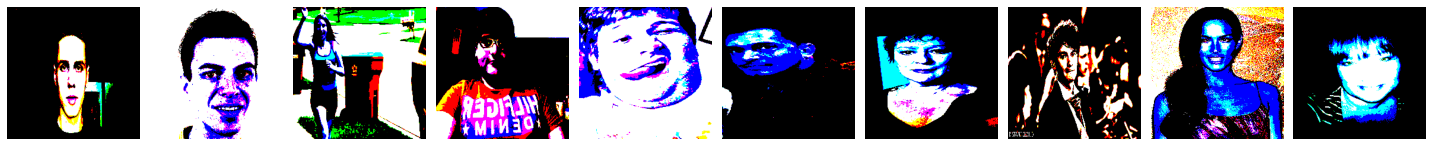

In [9]:
plotImages(imgs)

In [10]:
for label in labels:
    print(np.where(label == 1))
    # print(train_ds.class_indices)

(array([24], dtype=int64),)
(array([22], dtype=int64),)
(array([21], dtype=int64),)
(array([19], dtype=int64),)
(array([25], dtype=int64),)
(array([39], dtype=int64),)
(array([50], dtype=int64),)
(array([26], dtype=int64),)
(array([29], dtype=int64),)
(array([43], dtype=int64),)


In [11]:
vgg16_model = VGG16()

In [12]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model = keras.Sequential()

In [14]:
for layer in vgg16_model.layers[:-1]:
        model.add(layer)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [16]:

if not LAST_TRAINABLE_LAYERS:
    for layer in model.layers:
        layer.trainable = False
else:
    for layer in vgg16_model.layers[:-LAST_TRAINABLE_LAYERS]:
        layer.trainable = False

In [17]:
model.add(Dense(units=84 , activation='softmax'))

In [18]:
# for layer in model.layers[14:]: 
#     print(f"{layer}: {layer.trainable}")
#     layer.trainable = True 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [19]:
model.compile(optimizer=Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy', age_mae])


In [20]:
model.fit(x=train_ds,steps_per_epoch=len(train_ds),validation_data=valid_ds, validation_steps=len(valid_ds), epochs=30, verbose=2, callbacks=[tensorboard_callback])

Epoch 1/30
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


C:\dev\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
C:\dev\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 206 bytes but only got 0. Skipping tag 0
  warnings.warn(
C:\dev\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  warnings.warn(
C:\dev\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 170 bytes but only got 0. Skipping tag 0
  warnings.warn(
C:\dev\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 178 bytes but only got 0. Skipping tag 0
  warnings.warn(
C:\dev\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expe

409/409 - 71s - loss: 5.8239 - accuracy: 0.0524 - age_mae: 9.1129 - val_loss: 6.2247 - val_accuracy: 0.0427 - val_age_mae: 10.0787
Epoch 2/30
409/409 - 111s - loss: 2.9823 - accuracy: 0.2783 - age_mae: 6.6871 - val_loss: 6.6044 - val_accuracy: 0.0441 - val_age_mae: 9.2728
Epoch 3/30
409/409 - 110s - loss: 1.8670 - accuracy: 0.4835 - age_mae: 4.9343 - val_loss: 6.7112 - val_accuracy: 0.0494 - val_age_mae: 9.0103
Epoch 4/30
409/409 - 111s - loss: 1.2421 - accuracy: 0.6428 - age_mae: 3.5306 - val_loss: 7.1186 - val_accuracy: 0.0407 - val_age_mae: 9.0140
Epoch 5/30
409/409 - 109s - loss: 0.8999 - accuracy: 0.7425 - age_mae: 2.7350 - val_loss: 7.2936 - val_accuracy: 0.0427 - val_age_mae: 9.1444
Epoch 6/30
409/409 - 109s - loss: 0.6287 - accuracy: 0.8215 - age_mae: 2.0226 - val_loss: 7.2313 - val_accuracy: 0.0514 - val_age_mae: 8.9496
Epoch 7/30
409/409 - 110s - loss: 0.4530 - accuracy: 0.8871 - age_mae: 1.5818 - val_loss: 7.7579 - val_accuracy: 0.0407 - val_age_mae: 9.2666
Epoch 8/30
409/40

In [ ]:
image_path = '../data/regression/valid/004193.jpg'
plt.imread(image_path)
plt.show()

In [ ]:
img = image.load_img(image_path, target_size=(224, 224))

img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)


prediction = np.argmax(model.predict(img_preprocessed), axis=-1)

print(prediction)